<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/improvement_Lucia/ICaRLMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [1]:
import os
import logging
import sys

In [2]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone -b improvement_Lucia https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 2296 (delta 50), reused 0 (delta 0), pack-reused 2213
Receiving objects: 100% (2296/2296), 2.47 MiB | 28.45 MiB/s, done.
Resolving deltas: 100% (1470/1470), done.


# Import packages

In [3]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR.data_set import Subset
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from DatasetCIFAR import ICaRLModel
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import random
random.seed(params.SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(params.SEED)
print(params.NUM_WORKERS)

653
4


# Define Datasets

In [5]:
train_transformer = transforms.Compose([transforms.RandomCrop(size = 32, padding=4),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transformer = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
trainDS = Dataset(train=True)
testDS = Dataset(train=False)

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [7]:
train_splits = trainDS.splits
test_splits = testDS.splits

# Define Network

In [8]:
ICaRL = ResNet.resnet32(num_classes=100)
ICaRL =  ICaRL.to(params.DEVICE)

In [9]:
BIC = ResNet.BICModel()

In [10]:
exemplars = [None]*100

test_indexes =  []
accs = []

Streaming output truncated to the last 5000 lines.
        [-14.5372, -12.3149, -11.4527,  ..., -11.0481, -11.5968, -11.3608]],
       device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[ -8.8178,  -5.8414,  -5.0973,  ...,  -5.7426,  -6.2852,  -5.3413],
        [ -6.8983,  -3.0839,   1.6251,  ...,  -6.5206,  -4.7943,  -7.9565],
        [ -8.1251,  -5.2150,  -4.4658,  ...,  -8.7626,  -6.1812,   1.3099],
        ...,
        [  4.8735,  -9.6197, -10.0762,  ..., -10.9695,  -4.4450,  -7.4881],
        [ -5.7185,  -7.6355,  -6.6099,  ...,  -8.0639,  -4.5297,   4.5081],
        [-10.2414,  -9.0678,  -7.1987,  ..., -10.5506,  -7.9773, -10.2132]],
       device='cuda:0', grad_fn=<IndexBackward>)
tensor([[-12.4267,  -9.8020,  -9.5167,  ...,  -9.5279,  -9.8817,  -9.5367],
        [-11.8857, -10.3669,  -9.8750,  ...,  -8.9875,  -9.3731,  -9.9225],
        [-10.9781,  -9.7108,  -8.6669,  ...,  -8.8507,  -8.8043,  -8.3539],
        ...,
        [-15.8136, -13.5878, -12.6474,  ..., -12.3065, -12.8056

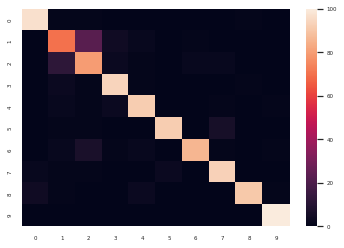

l = 200
l= 2.0855175364431489e-07
l= 1.609731761443265e-20


/content/DatasetCIFAR/ICaRLModel.py:42: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = criterion(m(pNew), m(pOld) )


l= 2.0855424054389005e-07
l= 1.609764073185943e-20
l= 2.0855767957073112e-07
l= 1.6097975158396145e-20
l= 2.0856019489201572e-07
l= 1.6098291813474388e-20
l= 2.0856268179159088e-07
l= 1.6098626240011104e-20
l= 2.0856525395629433e-07
l= 1.6098962282134954e-20
l= 2.0856795401869022e-07
l= 1.6099283783974598e-20
l= 2.085704693399748e-07
l= 1.6099623057272716e-20
l= 2.0857302729382354e-07
l= 1.6099946174699494e-20
l= 2.0857638105553633e-07
l= 1.610028060123621e-20
l= 2.085782284666493e-07
l= 1.610059564072732e-20
l= 2.0858146854152437e-07
l= 1.6100930067264035e-20
l= 2.0858418281477498e-07
l= 1.6101254800277947e-20
l= 2.0858666971435014e-07
l= 1.610158761122753e-20
l= 2.0858956872871204e-07
l= 1.6101912344241442e-20
l= 2.0859172877862875e-07
l= 1.6102253233126693e-20
l= 2.0859442884102464e-07
l= 1.6102576350553472e-20
l= 2.0859802418726758e-07
l= 1.6102901083567384e-20
l= 2.0859951632701268e-07
l= 1.6103224200994163e-20
l= 2.086028985104349e-07
l= 1.6103560243118012e-20
l= 2.08605797524796

In [ ]:
for task in range(0, 100, params.TASK_SIZE):
  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes, transform = train_transformer)
  test_dataset = Subset(testDS, test_indexes, transform = test_transformer)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE, shuffle=True)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE , shuffle=True )
  
  ICaRL, exemplars = ICaRLModel.incrementalTrain(task, trainDS, ICaRL, exemplars, train_transformer, BIC = BIC)

  col = []
  for i,x in enumerate( train_splits[ :int(task/10) + 1]) : 
    v = np.array(x)
    col = np.concatenate( (col,v), axis = None)
    col = col.astype(int)
  mean = None
  total = 0.0
  running_corrects = 0.0
  for img, lbl, _ in train_loader:
      img = img.float().to(params.DEVICE)
      preds, mean = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'train accuracy = {accuracy}')
  accs.append(accuracy)

  total = 0.0
  running_corrects = 0.0
  tot_preds = []
  tot_lab = []
  for img, lbl, _ in test_loader:
      img = img.float().to(params.DEVICE)
      preds, _ = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      tot_preds = np.concatenate( ( tot_preds, preds.data.cpu().numpy() ) )
      tot_lab = np.concatenate( (tot_lab, labels.data.cpu().numpy()  ) )

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'test accuracy = {accuracy}')
  cf = confusion_matrix(tot_lab, tot_preds)
  df_cm = pd.DataFrame(cf, range(task + params.TASK_SIZE), range(task + params.TASK_SIZE))
  sn.set(font_scale = .5) # for label size
  sn.heatmap(df_cm, annot=False)
  plt.show()

In [ ]:
accs = [.89,.81,.76,.69,.64,.59,.55,.53,.49,.46]

In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def plotTask(pars_tasks):

  x_tasks =  np.linspace(10, 100, 10)

  plt.plot(x_tasks, pars_tasks, label=['Accuracy'])
  plt.xlabel("Epoch")
  plt.ylim(0,1)
  plt.title('Accuracy over tasks')
  plt.legend(['Accuracy'])
  plt.grid(True)
  plt.show()

In [ ]:
plotTask(accs)